Consider only the below columns and prepare a prediction model for predicting Price.
Corolla<-Corolla[c("Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight")]

<br>Model -- model of the car
<br>Price  -- Offer Price in EUROs	
<br>Age_08_04 -- Age in months as in August 2004	
<br>Mfg_Month -- Manufacturing month (1-12)	
<br>Mfg_Year	-- Manufacturing Year
<br>KM -- Accumulated Kilometers on odometer
<br>Fuel_Type	 -- Fuel Type (Petrol, Diesel, CNG)
<br>HP -- Horse Power
<br>Met_Color	 -- Metallic Color?  (Yes=1, No=0)
<br>Color -- Color (Blue, Red, Grey, Silver, Black, etc.)
<br>Automatic	-- Automatic ( (Yes=1, No=0)
<br>cc -- Cylinder Volume in cubic centimeters
<br>Doors -- Number of doors
<br>Cylinders	-- Number of cylinders
<br>Gears -- Number of gear positions
<br>Quarterly_Tax -- Quarterly road tax in EUROs
<br>Weight -- Weight in Kilograms
<br>Mfr_Guarantee -- Within Manufacturer's Guarantee period  (Yes=1, No=0)
<br>BOVAG_Guarantee -- BOVAG (Dutch dealer network) Guarantee  (Yes=1, No=0)
<br>Guarantee_Period -- 	Guarantee period in months
<br>ABS -- Anti-Lock Brake System (Yes=1, No=0)
<br>Airbag_1 -- Driver_Airbag  (Yes=1, No=0)
<br>Airbag_2 -- Passenger Airbag  (Yes=1, No=0)
<br>Airco -- Airconditioning  (Yes=1, No=0)
<br>Automatic_airco -- Automatic Airconditioning  (Yes=1, No=0)
<br>Boardcomputer -- Boardcomputer  (Yes=1, No=0)
<br>CD_Player -- CD Player  (Yes=1, No=0)
<br>Central_Lock -- Central Lock  (Yes=1, No=0)
<br>Powered_Windows -- Powered Windows  (Yes=1, No=0)
<br>Power_Steering -- Power Steering  (Yes=1, No=0)
<br>Radio -- Radio  (Yes=1, No=0)
<br>Mistlamps	-- Mistlamps  (Yes=1, No=0)
<br>Sport_Model -- Sport Model  (Yes=1, No=0)
<br>Backseat_Divider -- Backseat Divider  (Yes=1, No=0)
<br>Metallic_Rim --Metallic Rim  (Yes=1, No=0)
<br>Radio_cassette -- Radio Cassette  (Yes=1, No=0)
<br>Tow_Bar -- Tow Bar  (Yes=1, No=0)




In [211]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import influence_plot
%matplotlib inline

In [212]:
toyota_df = pd.read_csv("ToyotaCorolla.csv", encoding="ANSI")
toyota_df.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [213]:
df = toyota_df[["Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"]].copy()

In [214]:
#Rename the columns 
df1 = df.rename(mapper={"Age_08_04":"Age","cc":"CC","Quarterly_Tax":"QT"},axis=1)
df1


,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [215]:
df1[df1.duplicated()]

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
113,24950,8,13253,116,2000,5,5,234,1320


In [216]:
df1.drop_duplicates(inplace=True)
df1[df1.index==113]

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight


In [217]:
df1.describe()

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
count,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000
mean,10720.915679,55.980488,68571.782578,101.491986,1576.560976,4.032753,5.026481,87.020209,1072.287108
std,3608.732978,18.563312,37491.094553,14.981408,424.387533,0.952667,0.188575,40.959588,52.251882
min,4350.000000,1.000000,1.000000,69.000000,1300.000000,2.000000,3.000000,19.000000,1000.000000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.000000,3.000000,5.000000,69.000000,1040.000000
50%,9900.000000,61.000000,63451.000000,110.000000,1600.000000,4.000000,5.000000,85.000000,1070.000000
75%,11950.000000,70.000000,87041.500000,110.000000,1600.000000,5.000000,5.000000,85.000000,1085.000000
max,32500.000000,80.000000,243000.000000,192.000000,16000.000000,5.000000,6.000000,283.000000,1615.000000


# Correlation Analysis

In [218]:
df1.corr()

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
Price,1.000000,-0.876273,-0.569420,0.314134,0.124375,0.183604,0.063831,0.211508,0.575869
Age,-0.876273,1.000000,0.504575,-0.155293,-0.096549,-0.146929,-0.005629,-0.193319,-0.466484
KM,-0.569420,0.504575,1.000000,-0.332904,0.103822,-0.035193,0.014890,0.283312,-0.023969
HP,0.314134,-0.155293,-0.332904,1.000000,0.035207,0.091803,0.209642,-0.302287,0.087143
CC,0.124375,-0.096549,0.103822,0.035207,1.000000,0.079254,0.014732,0.305982,0.335077
Doors,0.183604,-0.146929,-0.035193,0.091803,0.079254,1.000000,-0.160101,0.107353,0.301734
Gears,0.063831,-0.005629,0.014890,0.209642,0.014732,-0.160101,1.000000,-0.005125,0.021238
QT,0.211508,-0.193319,0.283312,-0.302287,0.305982,0.107353,-0.005125,1.000000,0.621988
Weight,0.575869,-0.466484,-0.023969,0.087143,0.335077,0.301734,0.021238,0.621988,1.000000


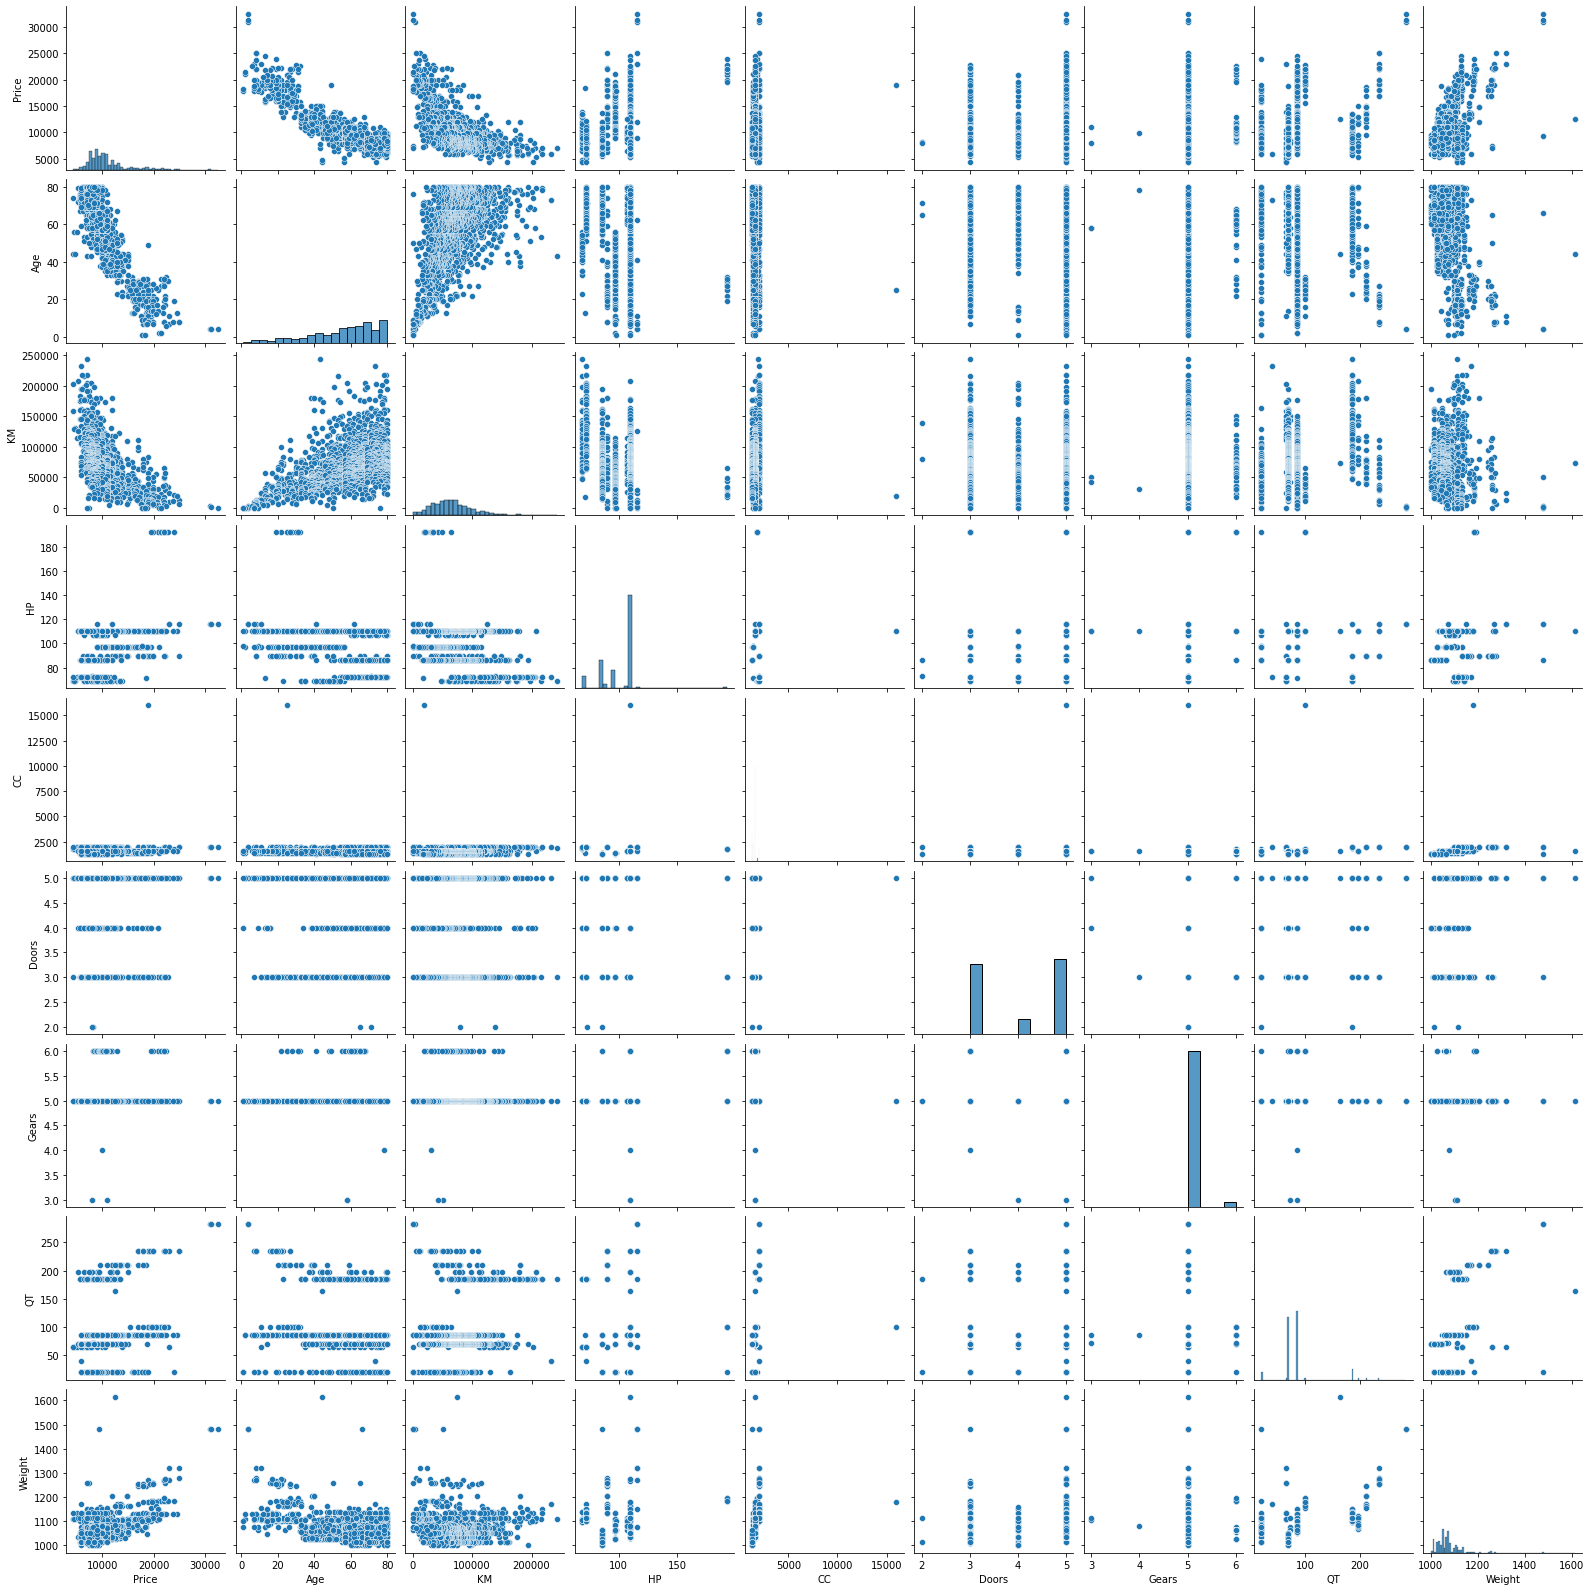

In [219]:
sns.pairplot(df1)

# Model Building

In [220]:
model=smf.ols('Price~Age+KM+HP+CC+Doors+Gears+QT+Weight',data=df1).fit()

# Model Testing

In [221]:
#Finding Coefficient parameters
model.params

Intercept   -5472.540368
Age          -121.713891
KM             -0.020737
HP             31.584612
CC             -0.118558
Doors          -0.920189
Gears         597.715894
QT              3.858805
Weight         16.855470
dtype: float64

In [222]:
# Finding tvalues and pvalues
pd.DataFrame([model.tvalues , np.round(model.pvalues,decimals=5)],index=["T-values","P-values"])


,Intercept,Age,KM,HP,CC,Doors,Gears,QT,Weight
T-values,-3.875273,-46.551876,-16.552424,11.209719,-1.316436,-0.023012,3.034563,2.944198,15.760663
P-values,0.000110,0.000000,0.000000,0.000000,0.188240,0.981640,0.002450,0.003290,0.000000


In [223]:
# Finding rsquared values
print(f"R-squared: {model.rsquared}\nR-Squared_adj{model.rsquared_adj}")   

R-squared: 0.8625200256947001
R-Squared_adj0.8617487495415147


Model accuracy is 86.17%

Build SLR and MLR models for 'CC' and 'Doors' as P- vales in In significant<br>
check for tvalues and pvalues

In [224]:
slr_c=smf.ols('Price~CC',data=df1).fit()
pd.DataFrame({"T-value":slr_c.tvalues,"P-value":slr_c.pvalues})

,T-value,P-value
Intercept,24.879592,7.236022e-114
CC,4.745039,2.292856e-06


CC Has Significient Pvalue in Explaning Price

In [225]:
slr_d=smf.ols('Price~Doors',data=df1).fit()
pd.DataFrame({"T-value":slr_d.tvalues,"P-value":slr_d.pvalues})

,T-value,P-value
Intercept,19.421546,8.976407e-75
Doors,7.070520,2.404166e-12


Doors also has significant pvalue

In [226]:
mlr_cd=smf.ols('Price~CC+Doors',data=df1).fit()
pd.DataFrame({"T-value":mlr_cd.tvalues,"P-value":mlr_cd.pvalues})

,T-value,P-value
Intercept,12.786341,1.580945e-35
CC,4.268006,2.101878e-05
Doors,6.752236,2.109558e-11


CC & Doors have significant pvalue in Explaining Price

# Model Validation Techniques

1. Calculating VIF = 1/(1-Rsquare) for all independent variables

In [227]:
rsq_age=smf.ols('Age~KM+HP+CC+Doors+Gears+QT+Weight',data=df1).fit().rsquared
vif_age=1/(1-rsq_age)

rsq_KM=smf.ols('KM~Age+HP+CC+Doors+Gears+QT+Weight',data=df1).fit().rsquared
vif_KM=1/(1-rsq_KM)

rsq_HP=smf.ols('HP~Age+KM+CC+Doors+Gears+QT+Weight',data=df1).fit().rsquared
vif_HP=1/(1-rsq_HP)

rsq_CC=smf.ols('CC~Age+KM+HP+Doors+Gears+QT+Weight',data=df1).fit().rsquared
vif_CC=1/(1-rsq_CC)

rsq_DR=smf.ols('Doors~Age+KM+HP+CC+Gears+QT+Weight',data=df1).fit().rsquared
vif_DR=1/(1-rsq_DR)

rsq_GR=smf.ols('Gears~Age+KM+HP+CC+Doors+QT+Weight',data=df1).fit().rsquared
vif_GR=1/(1-rsq_GR)

rsq_QT=smf.ols('QT~Age+KM+HP+CC+Doors+Gears+Weight',data=df1).fit().rsquared
vif_QT=1/(1-rsq_QT)

rsq_WT=smf.ols('Weight~Age+KM+HP+CC+Doors+Gears+QT',data=df1).fit().rsquared
vif_WT=1/(1-rsq_WT)

In [228]:
# Printing the values in Dataframe format
pd.DataFrame({'Variables':['Age','KM','HP','CC','Doors','Gears','QT','Weight'],'Vif':[vif_age,vif_KM,vif_HP,vif_CC,vif_DR,vif_GR,vif_QT,vif_WT]})

,Variables,Vif
0,Age,1.876236
1,KM,1.757178
2,HP,1.419180
3,CC,1.163470
4,Doors,1.155890
5,Gears,1.098843
6,QT,2.295375
7,Weight,2.487180


None variable has VIF>5, No Collinearity, so consider all varaibles in Regression equation

2. Residual Analysis(Test for Normality of Residuals)

C:\Users\AkashMY\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


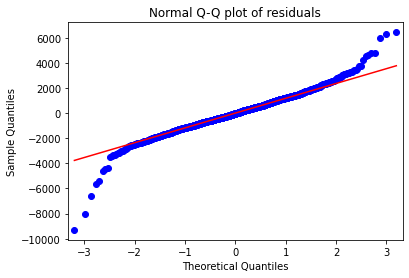

In [229]:
sm.qqplot(model.resid,line='q') # 'q' - A line is fit through the quartiles # line = '45'- to draw the 45-degree diagonal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [230]:
list(np.where(model.resid>6000))  # outliar detection from above QQ plot of residuals

[array([109, 146, 522], dtype=int64)]

In [231]:
list(np.where(model.resid<-6000))

[array([220, 600, 959], dtype=int64)]

3.Test for Homoscedasticity (plotting model's standardized fitted values vs standardized residual values)

In [232]:
def standard_values(vals) : return (vals-vals.mean())/vals.std()  # User defined z = (x - mu)/sigma

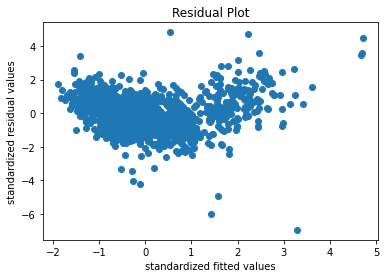

In [233]:
plt.scatter(standard_values(model.fittedvalues),standard_values(model.resid))
plt.title('Residual Plot')
plt.xlabel('standardized fitted values')
plt.ylabel('standardized residual values')
plt.show()

3. Test for errors or Residuals Vs Regressors or independent 'x' variables or predictors (using Residual Regression Plots)

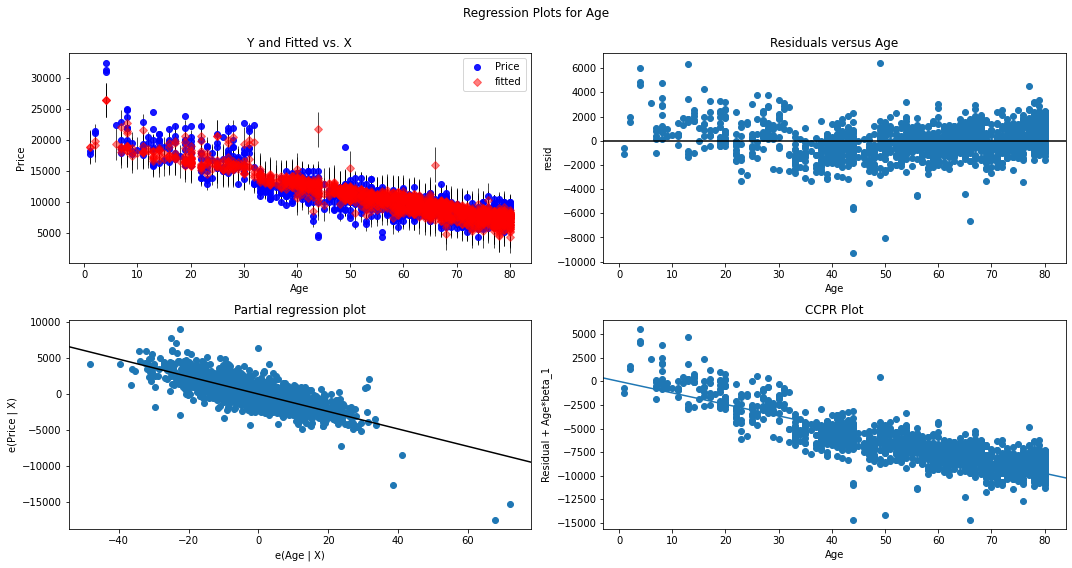

In [234]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'Age',fig=fig)
plt.show()

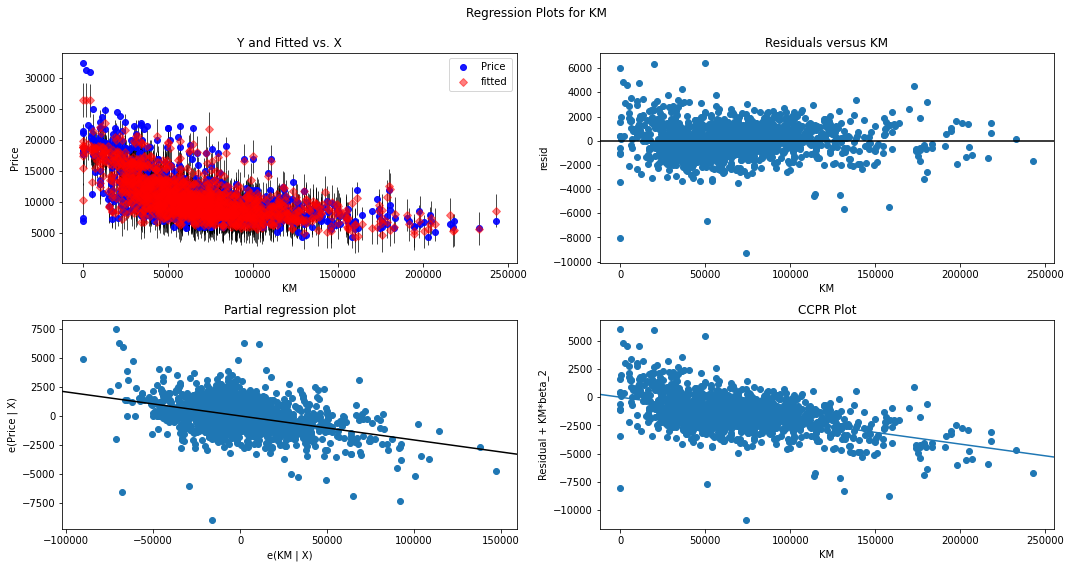

In [235]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'KM',fig=fig)
plt.show()

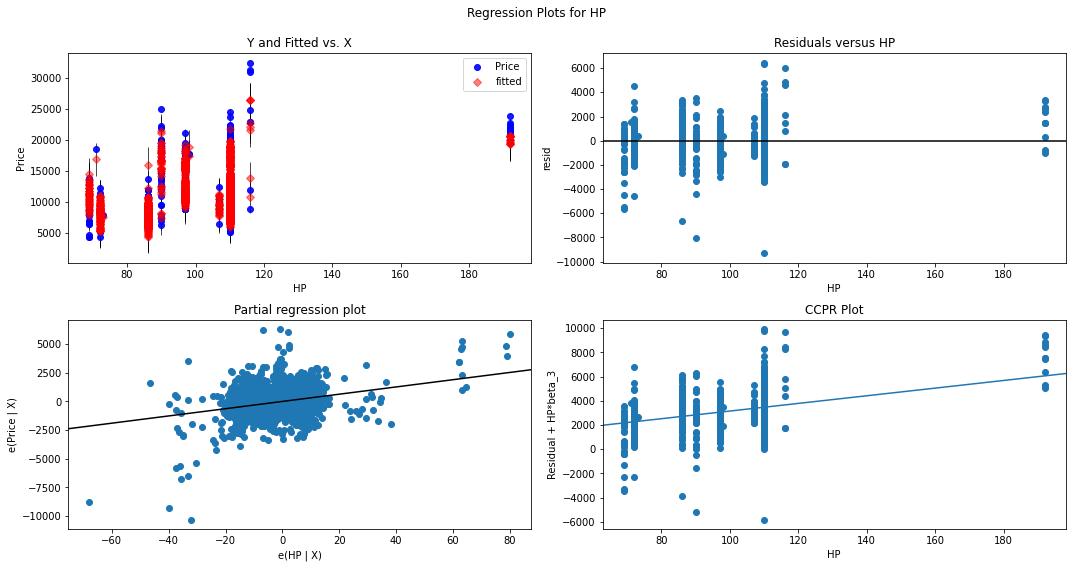

In [236]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'HP',fig=fig)
plt.show()

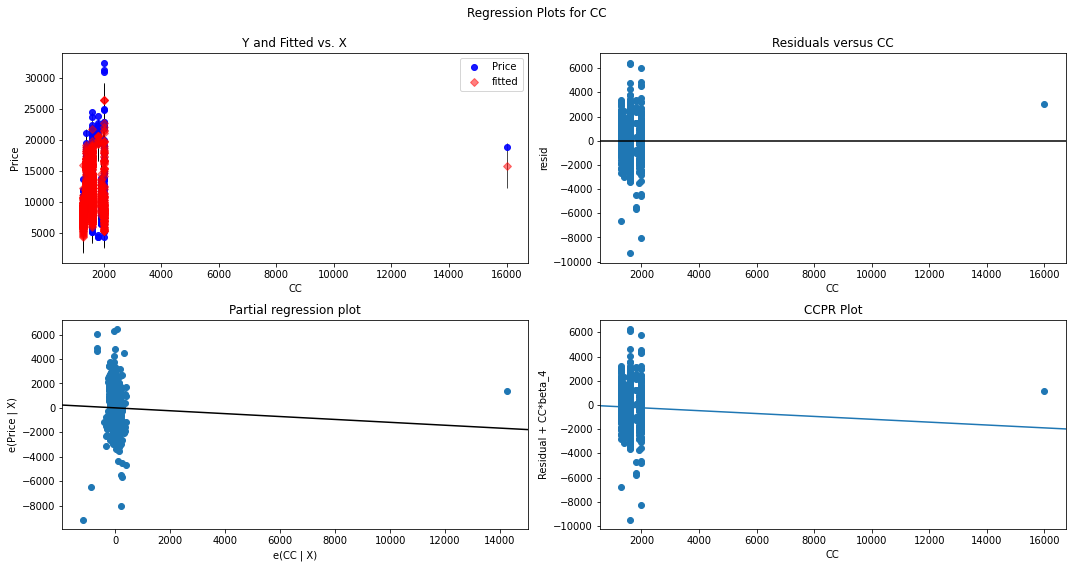

In [237]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'CC',fig=fig)
plt.show()

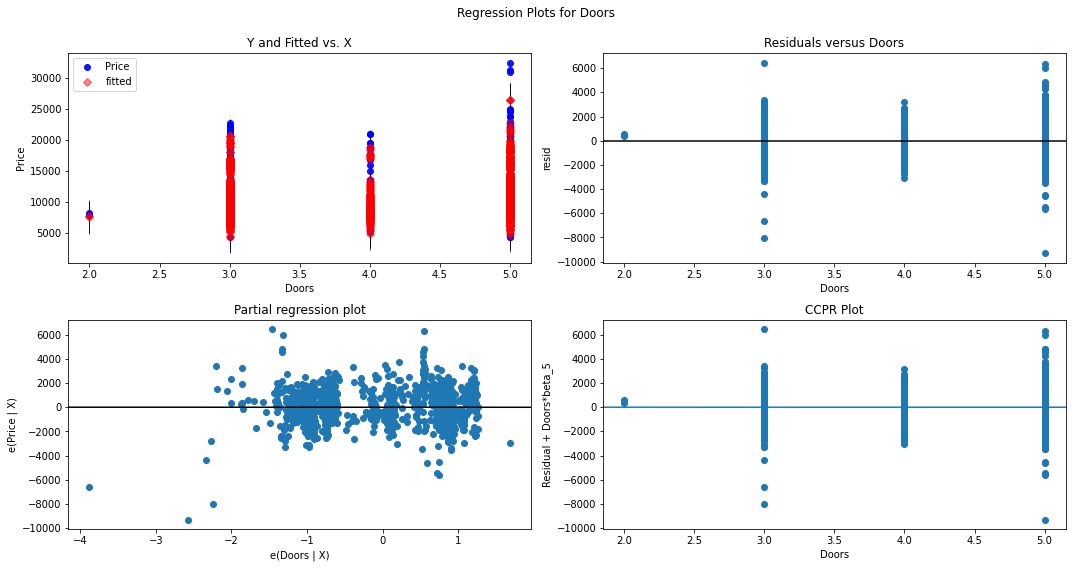

In [238]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'Doors',fig=fig)
plt.show()

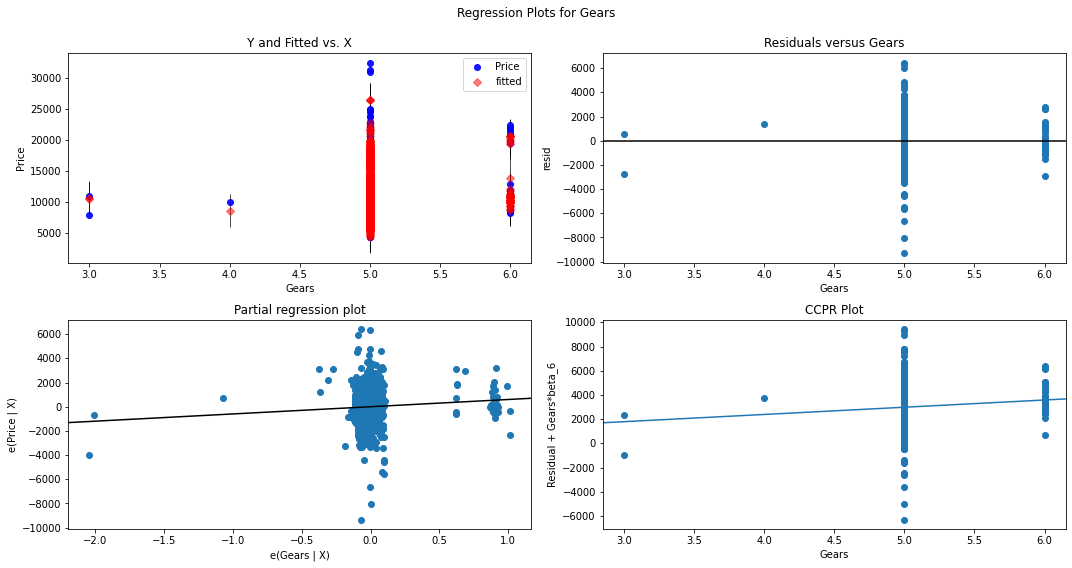

In [239]:
sm.graphics.plot_regress_exog(model,'Gears',fig=plt.figure(figsize=(15,8)))
plt.show()

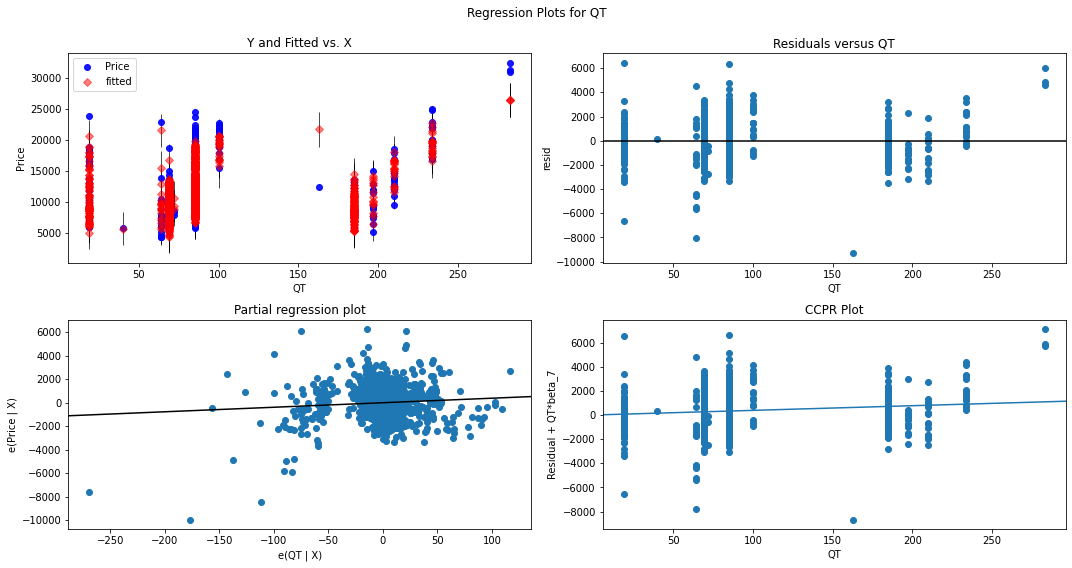

In [240]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'QT',fig=fig)
plt.show()

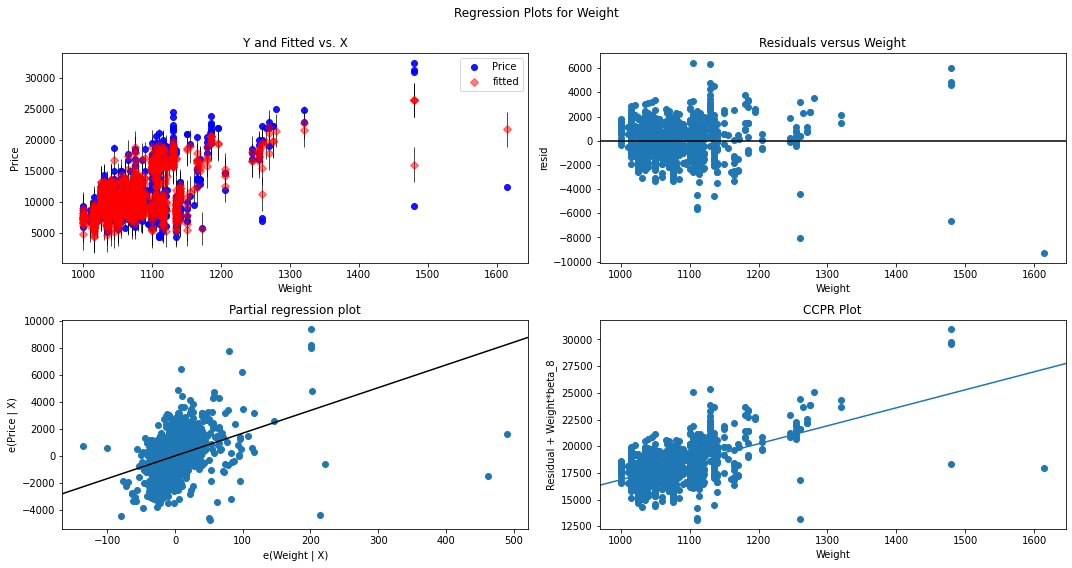

In [241]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'Weight',fig=fig)
plt.show()

# Model Deletion Diagnostics (checking Outliers or Influencers)

Two Techniques : 
1. Cook's Distance<br>
a. Cook's Distance: If Cook's distance > 1, then it's an outlier
2. Leverage value using High Influence Points<br>
a. Points beyond Leverage_cutoff value are influencers

1. Cook's Distance<br>
a. Cook's Distance: If Cook's distance > 1, then it's an outlier

In [242]:
# Get influencers using cook's distance
(c,_)=model.get_influence().cooks_distance
c

array([7.22221054e-03, 3.94547973e-03, 5.44224039e-03, ...,
       8.04110551e-07, 6.99854767e-04, 1.08408002e-02])

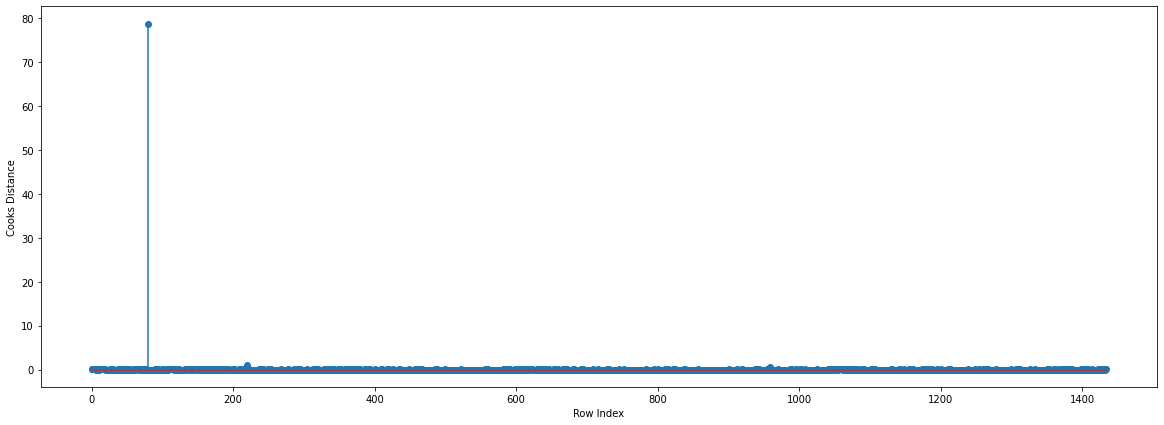

In [243]:
# Plot the influencers using the stem plot
fig=plt.figure(figsize=(20,7))
plt.stem(np.arange(len(df1)),np.round(c,3))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

In [244]:
# Index and value of influencer where C>0.5
np.argmax(c) , np.max(c)

(80, 78.72950582258598)

2. Leverage value using High Influence Points<br>
a. Points beyond Leverage_cutoff value are influencers

In [245]:
# Leverage Cuttoff Value = 3*(k+1)/n ; k = no.of features/columns & n = no. of datapoints
k=df1.shape[1]
n=df1.shape[0]
leverage_cutoff = (3*(k+1))/n
leverage_cutoff

0.020905923344947737

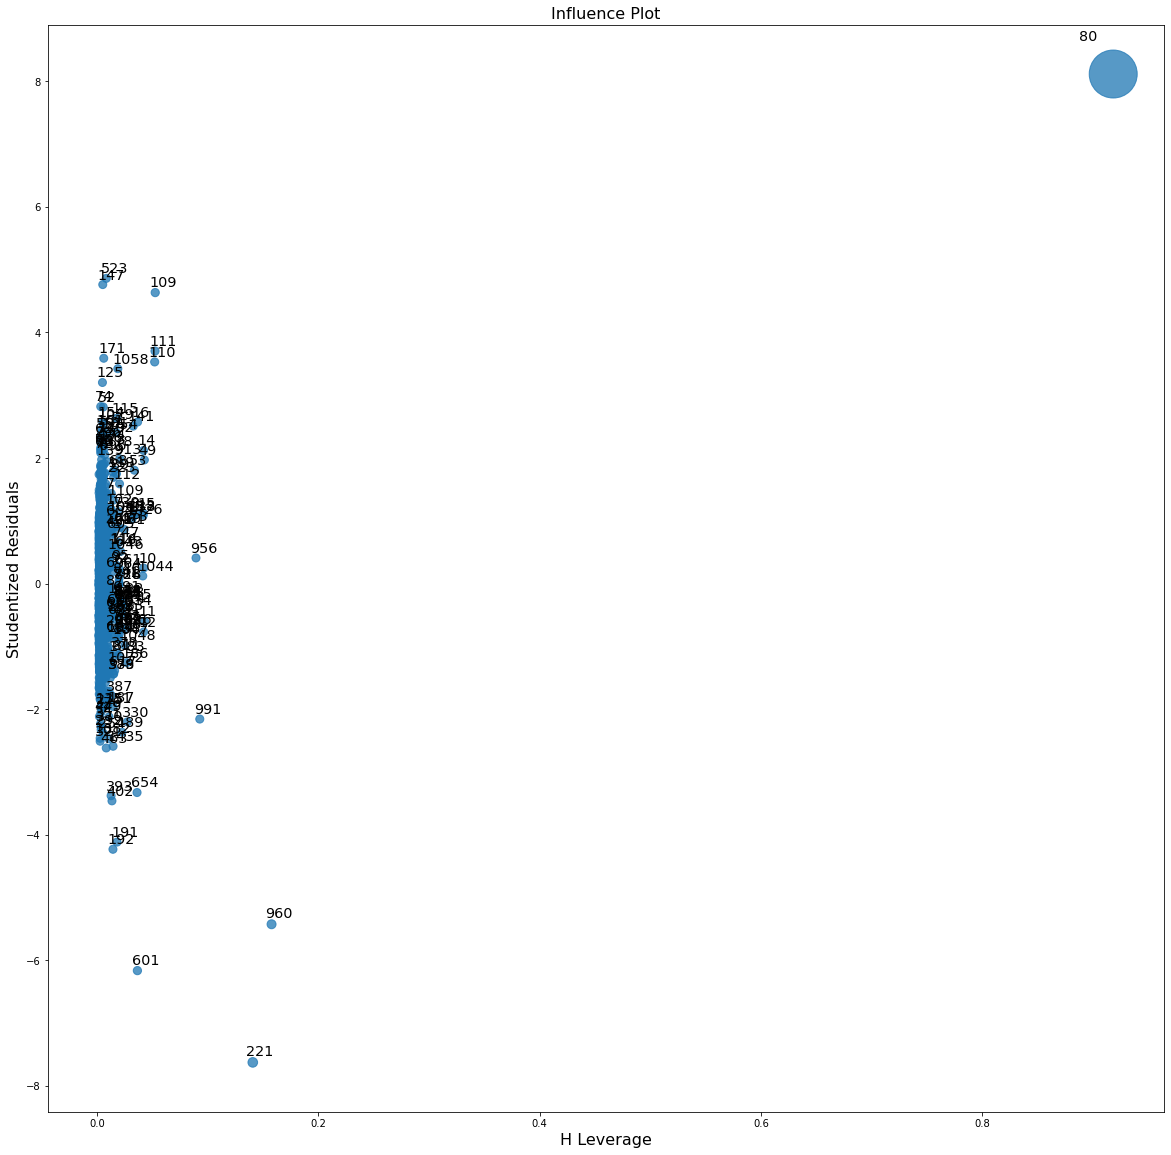

In [246]:
fig,ax=plt.subplots(figsize=(20,20))
fig=influence_plot(model,ax = ax)

From the above plot, it is evident that points beyond leverage cutoff value=0.020905 are the outliers

In [247]:
df1[df1.index.isin([80])]

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
80,18950,25,20019,110,16000,5,5,100,1180


# Improving the Model

In [248]:
# Creating a copy of data so that original dataset is not affected
df2 =df1.copy()
df2

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [249]:
# Discard the data points which are influencer and reassign the row number (reset_index(drop=True))
df2 =df1.drop(df1.index[[80]],axis=0).reset_index(drop=True)
df2

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1429,7500,69,20544,86,1300,3,5,69,1025
1430,10845,72,19000,86,1300,3,5,69,1015
1431,8500,71,17016,86,1300,3,5,69,1015
1432,7250,70,16916,86,1300,3,5,69,1015


In [250]:
# Model Deletion Diagnostics
while model.rsquared < 0.90:
    for c in [np.max(c)>0.5]:
        model=smf.ols('Price~Age+KM+HP+CC+Doors+Gears+QT+Weight',data=df2).fit()
        (c,_)=model.get_influence().cooks_distance
        c
        np.argmax(c) , np.max(c)
        df2=df2.drop(df2.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
        df2
    else:
        final_model=smf.ols('Price~Age+KM+HP+CC+Doors+Gears+QT+Weight',data=df2).fit()
        final_model.rsquared , final_model.aic
        print("Thus model accuracy is improved to",final_model.rsquared)

Thus model accuracy is improved to 0.8765926307402283
Thus model accuracy is improved to 0.8839684606741538
Thus model accuracy is improved to 0.8882395145171202
Thus model accuracy is improved to 0.8902571486612915
Thus model accuracy is improved to 0.8909888960319987
Thus model accuracy is improved to 0.8922595280462808
Thus model accuracy is improved to 0.8933621011392295
Thus model accuracy is improved to 0.8947147371605556
Thus model accuracy is improved to 0.8955233405057648
Thus model accuracy is improved to 0.8930210061069088
Thus model accuracy is improved to 0.8939546425147169
Thus model accuracy is improved to 0.8954112430715817
Thus model accuracy is improved to 0.8960182592139027
Thus model accuracy is improved to 0.8968403506948497
Thus model accuracy is improved to 0.8964026771830707
Thus model accuracy is improved to 0.8958538146890626
Thus model accuracy is improved to 0.8953750500147551
Thus model accuracy is improved to 0.8949455651565241
Thus model accuracy is impro

In [258]:
# Get influencers using cook's distance
(c,_)=model.get_influence().cooks_distance
c

array([4.07744529e-03, 5.50740213e-03, 3.31352657e-04, ...,
       4.81103195e-03, 2.65014182e-05, 2.08087412e-03])

final_model.rsquared # Model Accuracy is increased to 90.02%

In [266]:
df2

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13750,23,72937,90,2000,3,5,210,1165
1,14950,26,48000,90,2000,3,5,210,1165
2,13750,30,38500,90,2000,3,5,210,1170
3,12950,32,61000,90,2000,3,5,210,1170
4,16900,27,94612,90,2000,3,5,210,1245
...,...,...,...,...,...,...,...,...,...
1325,8450,80,23000,86,1300,3,5,69,1015
1326,7500,69,20544,86,1300,3,5,69,1025
1327,10845,72,19000,86,1300,3,5,69,1015
1328,8500,71,17016,86,1300,3,5,69,1015


# Model Predictions

In [267]:
# say New data for prediction is
new_data=pd.DataFrame({'Age':12,"KM":40000,"HP":80,"CC":1300,"Doors":4,"Gears":5,"QT":69,"Weight":1012},index=[0])
new_data

,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,12,40000,80,1300,4,5,69,1012


In [269]:
# Prediction of Price
final_model.predict(new_data)

0    14398.815471
dtype: float64